# Compare evaluations of different runs


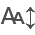

In [1]:
# imports
from __future__ import annotations
import pandas as pd
import yaml
from pathlib import Path
from typing import List, Dict, Any

from itables import init_notebook_mode
init_notebook_mode(all_interactive=True)

# autoreload
%load_ext autoreload
%autoreload 2

In [44]:
# fction that takes list of runs and list of fields to compare in a table
def get_row_from_fields(logdict: dict, fields: List[str]) -> Dict[str, Any]:
    row = {}
    for field in fields:
        subfields = field.split(":")
        out = logdict
        for sf in subfields:
            if not out:
                break
            out = out.get(sf, False)
        row[subfields[-1]] = out
    return row


def compare_runs(runs_folders: List[str], fields: List[str]) -> pd.DataFrame:
    runs_paths = [Path(run_folder) for run_folder in runs_folders]
    index = [run_path.parent.parent.name + "/" + run_path.name for run_path in runs_paths]
    df = pd.DataFrame()
    for i, folder in enumerate(runs_folders):
        with open(Path(folder) / "log_file.yaml", "r", encoding="utf-8") as f:
            logdict = yaml.safe_load(f)
        for key, value in logdict.items():
            if "evaluation_" in key:
                row = {"eval": key}
                row.update(get_row_from_fields(value, fields))
                df_row = pd.DataFrame(row, index=[index[i]])
                df = pd.concat([df,df_row])
                df.reset_index()
    return df


runs_folders = [
    "../predictions/tough-jazz-406_rassp1_neims1_200pt_200ft/NIST/1711198592_valid_full",
    "../predictions/tough-jazz-406_rassp1_neims1_200pt_200ft/NIST/1711198593_valid_full_200peaks",
    "../predictions/valiant-eon-418_rassp1_neims1_200peaks_masks/NIST/1712049653_valid_full_beam10_peaks300",
    "../predictions/valiant-eon-418_rassp1_neims1_200peaks_masks/NIST/1712049653_valid_full_beam10_peaks200",
    "../predictions/different-mountain-417_NClike/NIST/1712049552_valid_full_beam10_peaks300",
    "../predictions/different-mountain-417_NClike/NIST/1712049552_valid_full_beam10_peaks200",
    "../predictions/lucky-tree-293_4_8M_rassp1_neims1_224kPretrain/NIST/1710756718_valid_full_beam10_peaks300",
    "../predictions/lucky-tree-293_4_8M_rassp1_neims1_224kPretrain/NIST/1710756718_valid_full_beam10_peaks200",
    "../predictions/efficient-frog-407_rassp1_neims1_200pt_300ft/NIST/1711198715_valid_full_beam10",
    "../predictions/efficient-frog-407_rassp1_neims1_200pt_300ft/NIST/1711198715_valid_full_beam10_200peaks",
    ] 
fields = ["eval_config:fingerprint_type",
          "eval_config:simil_function",
          "eval_config:filtering_args:max_num_peaks",
          "percentage_of_precise_preds_similsort", 
          "db_search-percentage_of_BART_wins_similsort",
          "percentage_of_precise_preds_probsort",
          "percentage_of_better_than_threshold_similsort"

          ]
compare_runs(runs_folders, fields)

eval  \
tough-jazz-406_rassp1_neims1_200pt_200ft/171119...  evaluation_0   
tough-jazz-406_rassp1_neims1_200pt_200ft/171119...  evaluation_0   
valiant-eon-418_rassp1_neims1_200peaks_masks/17...  evaluation_0   
valiant-eon-418_rassp1_neims1_200peaks_masks/17...  evaluation_0   
different-mountain-417_NClike/1712049552_valid_...  evaluation_0   
different-mountain-417_NClike/1712049552_valid_...  evaluation_0   
lucky-tree-293_4_8M_rassp1_neims1_224kPretrain/...  evaluation_0   
lucky-tree-293_4_8M_rassp1_neims1_224kPretrain/...  evaluation_0   
efficient-frog-407_rassp1_neims1_200pt_300ft/17...  evaluation_0   
efficient-frog-407_rassp1_neims1_200pt_300ft/17...  evaluation_0   

                                                   fingerprint_type  \
tough-jazz-406_rassp1_neims1_200pt_200ft/171119...         daylight   
tough-jazz-406_rassp1_neims1_200pt_200ft/171119...         daylight   
valiant-eon-418_rassp1_neims1_200peaks_masks/17...         daylight   
valiant-eon-418_rassp1_neims1_200peaks_masks/17...         daylight   
different-mountain-417_NClike/1712049552_valid_...         daylight   
different-mountain-417_NClike/1712049552_valid_...         daylight   
lucky-tree-293_4_8M_rassp1_neims1_224kPretrain/...         daylight   
lucky-tree-293_4_8M_rassp1_neims1_224kPretrain/...         daylight   
efficient-frog-407_rassp1_neims1_200pt_300ft/17...         daylight   
efficient-frog-407_rassp1_neims1_200pt_300ft/17...         daylight   

                                                   simil_function  \
tough-jazz-406_rassp1_neims1_200pt_200ft/171119...       tanimoto   
tough-jazz-406_rassp1_neims1_200pt_200ft/171119...       tanimoto   
valiant-eon-418_rassp1_neims1_200peaks_masks/17...       tanimoto   
valiant-eon-418_rassp1_neims1_200peaks_masks/17...       tanimoto   
different-mountain-417_NClike/1712049552_valid_...       tanimoto   
different-mountain-417_NClike/1712049552_valid_...       tanimoto   
lucky-tree-293_4_8M_rassp1_neims1_224kPretrain/...       tanimoto   
lucky-tree-293_4_8M_rassp1_neims1_224kPretrain/...       tanimoto   
efficient-frog-407_rassp1_neims1_200pt_300ft/17...       tanimoto   
efficient-frog-407_rassp1_neims1_200pt_300ft/17...       tanimoto   

                                                    max_num_peaks  \
tough-jazz-406_rassp1_neims1_200pt_200ft/171119...            300   
tough-jazz-406_rassp1_neims1_200pt_200ft/171119...            200   
valiant-eon-418_rassp1_neims1_200peaks_masks/17...            300   
valiant-eon-418_rassp1_neims1_200peaks_masks/17...            200   
different-mountain-417_NClike/1712049552_valid_...            300   
different-mountain-417_NClike/1712049552_valid_...            200   
lucky-tree-293_4_8M_rassp1_neims1_224kPretrain/...            300   
lucky-tree-293_4_8M_rassp1_neims1_224kPretrain/...            200   
efficient-frog-407_rassp1_neims1_200pt_300ft/17...            300   
efficient-frog-407_rassp1_neims1_200pt_300ft/17...            200   

                                                   percentage_of_precise_preds_similsort  \
tough-jazz-406_rassp1_neims1_200pt_200ft/171119...                    0.4101572204280087   
tough-jazz-406_rassp1_neims1_200pt_200ft/171119...                    0.4224584666971498   
valiant-eon-418_rassp1_neims1_200peaks_masks/17...                    0.5653902118749334   
valiant-eon-418_rassp1_neims1_200peaks_masks/17...                    0.5870675201950922   
different-mountain-417_NClike/1712049552_valid_...                    0.5383468786598999   
different-mountain-417_NClike/1712049552_valid_...                    0.5593659503124524   
lucky-tree-293_4_8M_rassp1_neims1_224kPretrain/...                    0.5754693544380168   
lucky-tree-293_4_8M_rassp1_neims1_224kPretrain/...                     0.596822130772748   
efficient-frog-407_rassp1_neims1_200pt_300ft/17...                   0.42080420200873053   
efficient-frog-407_rassp1_neims1_200pt_300ft/17...                    0.4267261088248743 

## Visualize performance based on num of peaks
Or any metric based on any data-related parameter 

In [2]:
# imports
from __future__ import annotations
import sys 
sys.path.append("..")
from utils.data_utils import build_single_datapipe, filter_datapoints
import pandas as pd
import plotly.express as px
from collections import Counter

In [20]:
# ok.. put everything together
def visualize_inspected_statistic(best_preds_path: str,
                                  original_data_path: str,
                                  filtering_args: dict,
                                  inspected_statistic: callable,
                                  pregrouping_function: callable,
                                  plot_function: callable = px.box,
                                  plot_x_label: str | None = None,
                                  plot_y_label: str | None = None,
                                  plot_title: str | None = None) -> None:
    
    # load predictions and filter original data
    df_best_predictions = pd.read_json(best_preds_path, lines=True, orient="records")
    original_data = pd.read_json(original_data_path, lines=True, orient="records")
    filter_mask = original_data.progress_apply(lambda row: filter_datapoints(row, filtering_args), axis=1)
    filtered_original_data = original_data[filter_mask]

    combined_df = pd.concat([df_best_predictions.reset_index(drop=True), filtered_original_data.reset_index(drop=True)], axis=1)

    assert len(df_best_predictions) == len(filtered_original_data)

    # create a grouping column based on the pregrouping function
    combined_df["grouping_col"] = combined_df.apply(pregrouping_function, axis=1)

    # make a plot grouped by "grouping_col" showing "smiles_sim_of_closest_daylight_tanimoto"
    fig = plot_function(combined_df, x="grouping_col", y=inspected_statistic(combined_df))
    fig.update_layout(
                title=plot_title,
                xaxis_title=plot_x_label,
                yaxis_title=plot_y_label,
    )
    fig.show()


best_preds_path = "../predictions/valiant-eon-418_rassp1_neims1_200peaks_masks/NIST/1712049653_valid_full_beam10_peaks300/df_best_predictions.jsonl"
original_data_path = "../data/datasets/NIST/NIST_split_filip/db_index/valid_with_db_index.jsonl"

filtering_args = {"max_num_peaks": 300, "max_mz": 500, "max_mol_repr_len": 100, "mol_repr": "smiles"}

inspected_statistic = lambda df: df["smiles_sim_of_closest_daylight_tanimoto"]
pregrouping_function = lambda row: len(row["mz"]) // 10 * 10 # binned num of peaks

# num of predictions 
visualize_inspected_statistic(best_preds_path, 
                              original_data_path, 
                              filtering_args, 
                              lambda df: (df["smiles_sim_of_closest_daylight_tanimoto"] >= 0.85).astype(int), 
                              pregrouping_function, 
                              px.histogram, 
                              "Number of peaks", 
                              "smiles_sim_of_closest_daylight_tanimoto", 
                              "Number of good enough (>=0.85) predictions vs number of peaks")


visualize_inspected_statistic(best_preds_path, 
                              original_data_path, 
                              filtering_args, 
                              lambda df: (df["smiles_sim_of_closest_daylight_tanimoto"] == 1).astype(int), 
                              pregrouping_function, 
                              px.histogram, 
                              "Number of peaks", 
                              "smiles_sim_of_closest_daylight_tanimoto", 
                              "Number of perfect (==1) predictions vs number of peaks")


visualize_inspected_statistic(best_preds_path, 
                              original_data_path, 
                              filtering_args, 
                              inspected_statistic, 
                              pregrouping_function, 
                              px.box, 
                              "Number of peaks", 
                              "smiles_sim_of_closest_daylight_tanimoto", 
                              "Median (simil_best) smiles similarity vs number of peaks")


visualize_inspected_statistic(best_preds_path, 
                              original_data_path, 
                              filtering_args, 
                              inspected_statistic, 
                              lambda row: len(row["smiles"]), 
                              px.box, 
                              "Len of SMILES", 
                              "smiles_sim_of_closest_daylight_tanimoto", 
                              "Median (simil_best) smiles similarity vs len of SMILES")   

In [11]:
# histogram of lens of spectra
pregrouping_function = lambda x: len(x["mz"]) // 10 * 10
inspected_statistic = lambda df: [1] * len(df)
visualize_inspected_statistic(best_preds_path, 
                              original_data_path, 
                              filtering_args, 
                              inspected_statistic, 
                              pregrouping_function, 
                              px.histogram, 
                              "Number of peaks", 
                              "count", 
                              "Num of peaks histo")


100%|██████████| 29053/29053 [00:05<00:00, 5144.49it/s]


# Evaluate only C, H, O, N containing molecules


In [6]:
# imports
from __future__ import annotations
import sys 
sys.path.append("..")
from utils.data_utils import build_single_datapipe, filter_datapoints
import pandas as pd
import plotly.express as px
from collections import Counter
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit import DataStructs

In [19]:
# edited version

def get_atom_types(smiles):
    # Parse the SMILES string to get the molecule object
    molecule = Chem.MolFromSmiles(smiles)
    
    if molecule is None:
        raise ValueError("Invalid SMILES string")
    
    # Get the atom types
    atom_types = [atom.GetSymbol() for atom in molecule.GetAtoms()]
    
    return atom_types

def smiles_filter(row):
    return all([atom in ["C", "H", "N", "O"] for atom in get_atom_types(row["gt_smiles"])])

def visualize_conh_accuracy(best_preds_path: str,
                            original_data_path: str,
                            filtering_args: dict,
                            inspected_statistic: callable,
                            pregrouping_function: callable,
                            custom_filter: callable = None,
                            plot_function: callable = px.box,
                            plot_x_label: str | None = None,
                            plot_y_label: str | None = None,
                            plot_title: str | None = None) -> None:
    
    # load predictions and filter original data
    df_best_predictions = pd.read_json(best_preds_path, lines=True, orient="records")

    # custom filtering
    df_best_filtered = df_best_predictions[df_best_predictions.progress_apply(smiles_filter, axis=1)]
    display(df_best_filtered)
    df_best_filtered["exact"] = df_best_filtered.progress_apply(lambda row: row["gt_smiles"] == row["simil_best_smiless_morgan_tanimoto"], axis=1)
    counter = Counter(df_best_filtered["exact"])
    print(f"Precise predictions: {counter[True]/len(df_best_filtered)}")

    print(counter)
    # print("lens:", len(df_best_predictions), len(filtered_original_data))

    # filtered_original_data["exact"] = filtered_original_data.progress_apply(lambda row: row["gt_smiles"] == df_best_predictions["smiles"], axis=1)

    # # make a plot grouped by "grouping_col" showing "smiles_sim_of_closest_daylight_tanimoto"
    # counter = Counter(combined_df["grouping_col"])
    # print(counter)
    # fig = plot_function(combined_df, x="grouping_col") #, y=inspected_statistic(combined_df))
    # fig.update_layout(
    #             title=plot_title,
    #             xaxis_title=plot_x_label,
    #             yaxis_title=plot_y_label,
    # )
    # fig.show()


# best_preds_path = "../predictions/fearless-wildflower-490_rassp1_neims1_224kPretrain_148k/NIST/1715767948_test_full_beam50/df_best_predictions.jsonl"
best_preds_path = "../predictions/fearless-wildflower-490_rassp1_neims1_224kPretrain_148k/NIST/1715767948_test_full_beam50/df_best_predictions.jsonl"
original_data_path = "../data/datasets/NIST/NIST_split_filip/db_index/test_with_db_index.jsonl"

filtering_args = {"max_num_peaks": 300, "max_mz": 500, "max_mol_repr_len": 100, "mol_repr": "smiles"}

inspected_statistic = lambda df: df["smiles_sim_of_closest_daylight_tanimoto"]
pregrouping_function = lambda row: len(row["mz"]) // 10 * 10 # binned num of peaks

In [20]:
# measure accuracy for SMILES containing only C, H, N, O atoms

pregrouping_function = lambda row: row.gt_smiles == row.simil_best_smiless_morgan_tanimoto
inspected_statistic = lambda df: df["gt_smiles"] == df["simil_best_smiless_morgan_tanimoto"]

visualize_conh_accuracy(best_preds_path, 
                              original_data_path, 
                              filtering_args, 
                              inspected_statistic, 
                              pregrouping_function, 
                              plot_function=px.histogram, 
                              custom_filter=smiles_filter,
                              plot_x_label="Number of peaks", 
                              plot_y_label="Probability of the closest SMILES", 
                              plot_title="Probability of the closest SMILES by the number of peaks")

100%|██████████| 28267/28267 [00:09<00:00, 3118.61it/s]


gt_smiles  \
0                                      CCCCCC(O)CC(=O)OC   
2                                        CCC(CC)COC(C)=O   
4                            CC1CCC23C(C)CCC(CC12)C3(C)C   
9                                      CC(C)=CCCC=C(C)CO   
12                                   CCCCN(C(C)=O)C(C)=O   
...                                                  ...   
28260   N#CC(C#N)C(C#N)(C#N)CC(=O)c1cccc([N+](=O)[O-])c1   
28261            COC(C(C#N)OC(C)=O)C(OC(C)=O)C(C)OC(C)=O   
28263                c1ccc(-c2nc(N3CCOCC3)c3ccccc3n2)cc1   
28264  CC(C)CCCC(C)C1CCC2C3CC(=O)C4=CC(O)CCC4(C)C3CCC12C   
28266       O=C(C=Cc1cccc([N+](=O)[O-])c1)c1ccc2ccccc2c1   

                      simil_best_smiless_morgan_tanimoto  \
0                                      CCCCCC(O)CC(=O)OC   
2                                        CCC(CC)COC(C)=O   
4                            CC1CCC23C(C)CCC2C(C)(C)CC13   
9                                      CC(C)=CCCC=C(C)CO   
12                                   CCCCN(C(C)=O)C(C)=O   
...                                                  ...   
28260  N#CC1(C#N)C(C(=O)c2cccc([N+](=O)[O-])c2)C1(C#N...   
28261            COC(C(C)OC(C)=O)C(OC(C)=O)C(C#N)OC(C)=O   
28263                c1ccc(-c2nc(N3CCOCC3)c3ccccc3n2)cc1   
28264  CC(C)CCCC(C)C1CCC2C3CC(=O)C4=CC(O)CCC4(C)C3CCC12C   
28266       O=C(C=Cc1cccc([N+](=O)[O-])c1)c1ccc2ccccc2c1   

                       prob_best_smiless_morgan_tanimoto  \
0                                      CCCCCC(O)CC(=O)OC   
2                                        CCC(C)CCOC(C)=O   
4                               CC1CCC=C2CCC(C(C)C)CC2C1   
9                                      CC(C)=CCCC(C)=CCO   
12                                   CCCCN(C(C)=O)C(C)=O   
...                                                  ...   
28260  N#CC1=C(N)OC(C(=O)c2cccc([N+](=O)[O-])c2)C1(C#...   
28261             COC1OC(C)C(OC(C)=O)C(OC(C)=O)C1OC(C)=O   
28263                c1ccc(-c2nc(N3CCOCC3)c3ccccc3n2)cc1   
28264       CC(C)CCCC(C)C1CCC2C3C(=O)C4CCCCC4(C)C3CCC12C   
28266       O=C(C=Cc1cccc([N+](=O)[O-])c1)c1ccc2ccccc2c1   

       simil_best_simil_morgan_tanimoto  prob_best_simil_morgan_tanimoto  
0                              1.000000                         1.000000  
2                              1.000000                         0.464286  
4                              0.378378                         0.120000  
9                              1.000000                         0.500000  
12                             1.000000                         1.000000  
...                                 ...                              ...  
28260                          0.480000                         0.387097  
28261                          0.866667                         0.173913  
28263                          1.000000                         1.000000  
28264                          1.000000                         0.492063  
28266                          1.000000                         1.000000  

[15694 rows x 5 columns]

100%|██████████| 15694/15694 [00:00<00:00, 143842.00it/s]

Precise predictions: 0.6700649929909519
Counter({True: 10516, False: 5178})



/tmp/ipykernel_3592859/2032271489.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_best_filtered["exact"] = df_best_filtered.progress_apply(lambda row: row["gt_smiles"] == row["simil_best_smiless_morgan_tanimoto"], axis=1)


In [5]:
def morgan_similartiy(smi1, smi2):
    fp1 = AllChem.GetMorganFingerprintAsBitVect(Chem.MolFromSmiles(smi1), 2, nBits=1024)
    fp2 = AllChem.GetMorganFingerprintAsBitVect(Chem.MolFromSmiles(smi2), 2, nBits=1024)
    print(type(fp1))
    return DataStructs.FingerprintSimilarity(fp1, fp2)

morgan_similartiy("CO", "O=CO")

# Thesis mess
Find a testing example and visualize all the candidate predistions along with their scores.

In [3]:
# imports
from __future__ import annotations
import sys 
sys.path.append("..")
from utils.data_utils import build_single_datapipe, filter_datapoints
import pandas as pd
import plotly.express as px
from collections import Counter
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit import DataStructs
import json
from tqdm import tqdm
import numpy as np

In [4]:
def morgan_similartiy(smi1, smi2):
    fp1 = AllChem.GetMorganFingerprintAsBitVect(Chem.MolFromSmiles(smi1), 2, nBits=1024)
    fp2 = AllChem.GetMorganFingerprintAsBitVect(Chem.MolFromSmiles(smi2), 2, nBits=1024)
    print(type(fp1))
    return DataStructs.FingerprintSimilarity(fp1, fp2)


def read_predicions(predictions_path: str, num_beams: int = 10):
    all_predictions = []
    with open(predictions_path, "r", encoding="utf-8") as f:
        for line in tqdm(f):
            candidates = list(json.loads(line.strip()).keys())
            all_candidates = candidates + [None] * (num_beams - len(candidates))
            all_predictions.append(all_candidates)

    all_predictions = np.array(all_predictions)
    df = pd.DataFrame({f"prediction_{i+1}": all_predictions[:, i] for i in range(num_beams)})
    return df


preds_path = "../predictions/fearless-wildflower-490_rassp1_neims1_224kPretrain_148k/NIST/1715767947_test_full_beam10/predictions.jsonl"
original_data_path = "../data/datasets/NIST/NIST_split_filip/db_index/test_with_db_index.jsonl"

filtering_args = {"max_num_peaks": 300, "max_mz": 500, "max_mol_repr_len": 100, "mol_repr": "smiles"}


inspected_statistic = lambda df: df["smiles_sim_of_closest_daylight_tanimoto"]
# load predictions and filter original data
df_predictions = read_predicions(preds_path)
original_data = pd.read_json(original_data_path, lines=True, orient="records")
filter_mask = original_data.progress_apply(lambda row: filter_datapoints(row, filtering_args), axis=1)
filtered_original_data = original_data[filter_mask]

combined_df = pd.concat([df_predictions.reset_index(drop=True), filtered_original_data.reset_index(drop=True)], axis=1)

assert len(df_predictions) == len(filtered_original_data)


28267it [00:00, 115501.23it/s]
100%|██████████| 29218/29218 [00:05<00:00, 5055.70it/s]


Ground truth: smiles    CCCCCC(O)CC(=O)OC
Name: 0, dtype: object


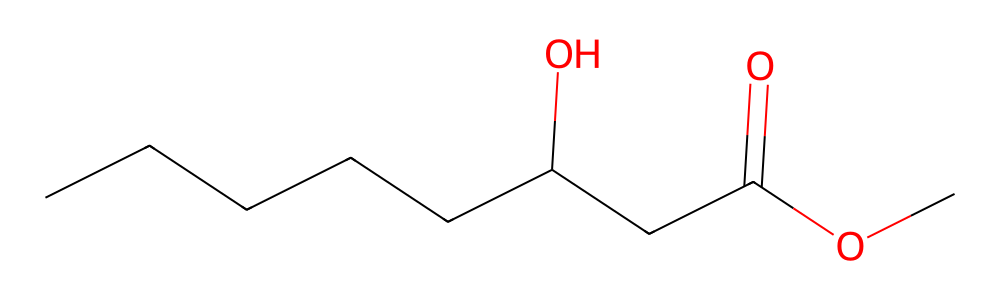

<class 'rdkit.DataStructs.cDataStructs.ExplicitBitVect'>
<class 'rdkit.DataStructs.cDataStructs.ExplicitBitVect'>
<class 'rdkit.DataStructs.cDataStructs.ExplicitBitVect'>
<class 'rdkit.DataStructs.cDataStructs.ExplicitBitVect'>
<class 'rdkit.DataStructs.cDataStructs.ExplicitBitVect'>
<class 'rdkit.DataStructs.cDataStructs.ExplicitBitVect'>
<class 'rdkit.DataStructs.cDataStructs.ExplicitBitVect'>
<class 'rdkit.DataStructs.cDataStructs.ExplicitBitVect'>
<class 'rdkit.DataStructs.cDataStructs.ExplicitBitVect'>
Prediction 1: CCCCCC(O)CC(=O)OC
Morgan similarity: 1.0


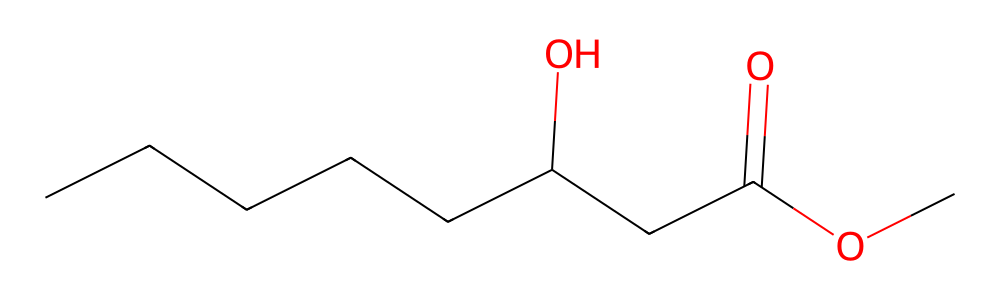

Prediction 2: CCCCCC(O)CC(=O)OC.Cl
Morgan similarity: 0.9615384615384616


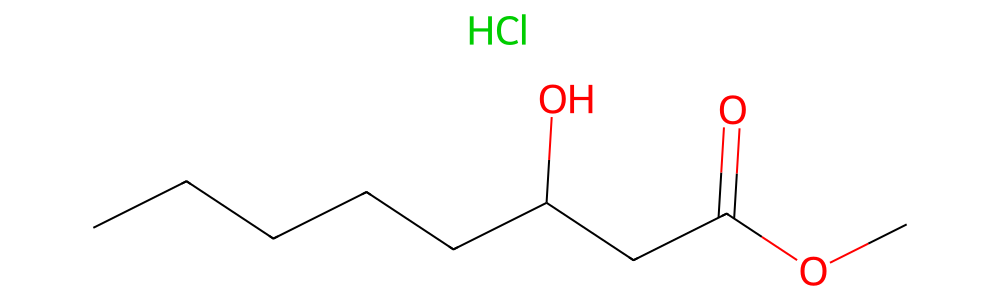

Prediction 3: CCCC(O)CC(=O)OC
Morgan similarity: 0.7407407407407407


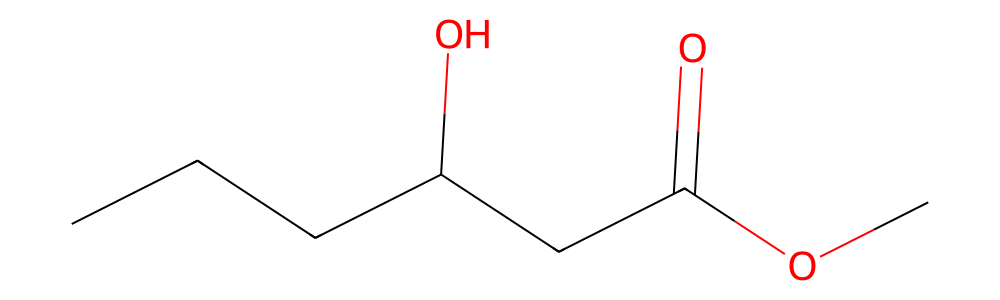

Prediction 4: CCCC(=O)CC(O)CC(=O)OC
Morgan similarity: 0.5625


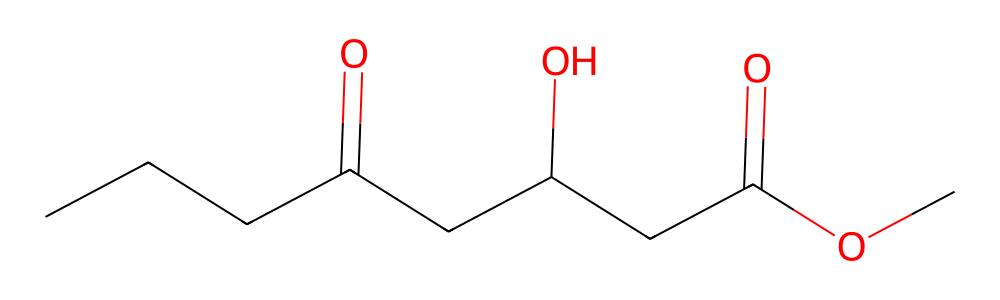

Prediction 5: CCCC#CCC(O)CC(=O)OC
Morgan similarity: 0.5588235294117647


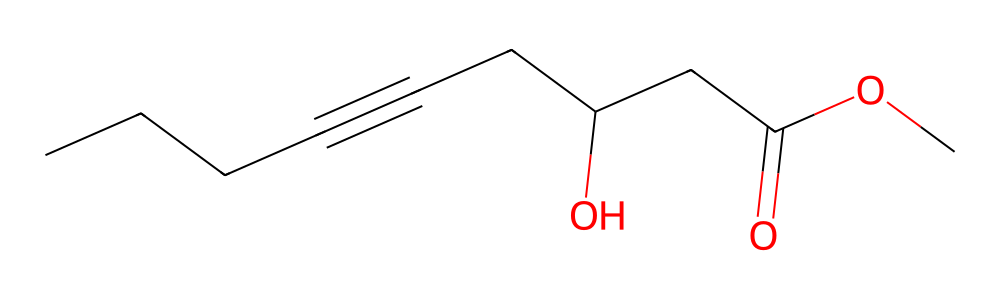

Prediction 6: CCCC(=O)OCC(O)CC(=O)OC
Morgan similarity: 0.5294117647058824


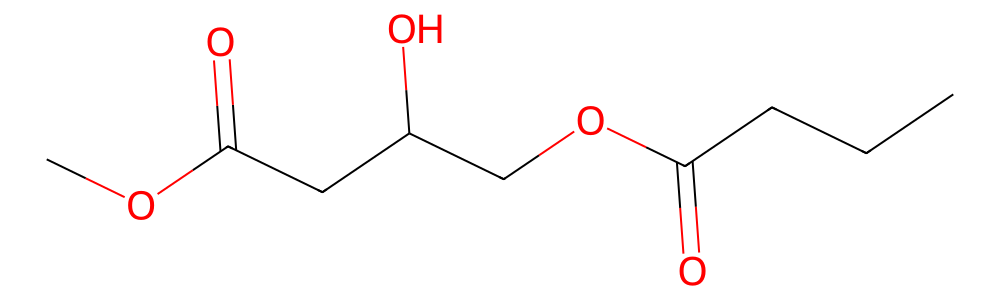

Prediction 7: CCCC=CC(O)CC(=O)OC
Morgan similarity: 0.4444444444444444


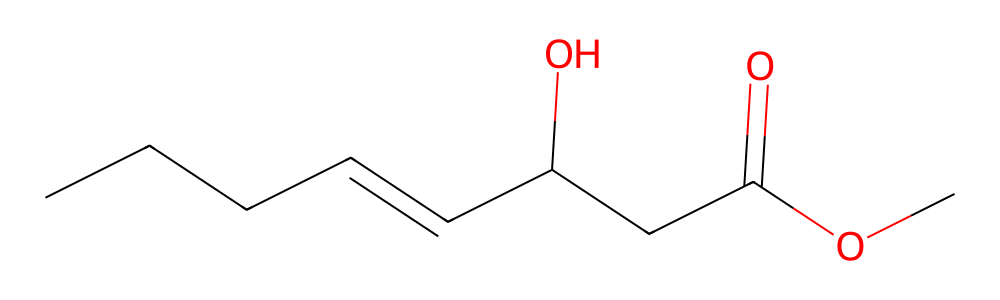

Prediction 8: CCCC(=O)OC(C)CCC(=O)OC
Morgan similarity: 0.3783783783783784


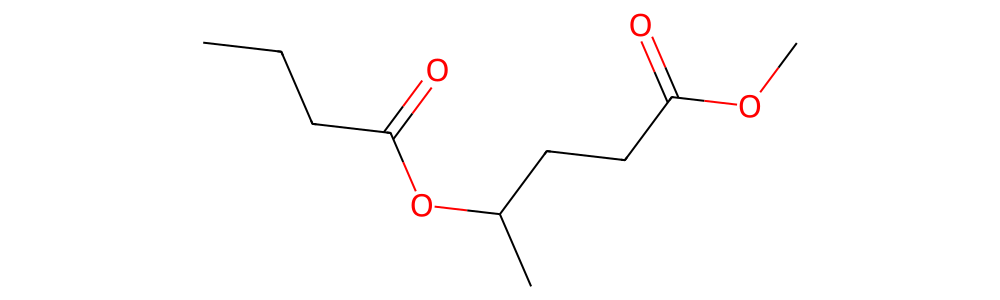

Prediction 9: CCCC(=O)CC(O)C(=O)OC
Morgan similarity: 0.37142857142857144


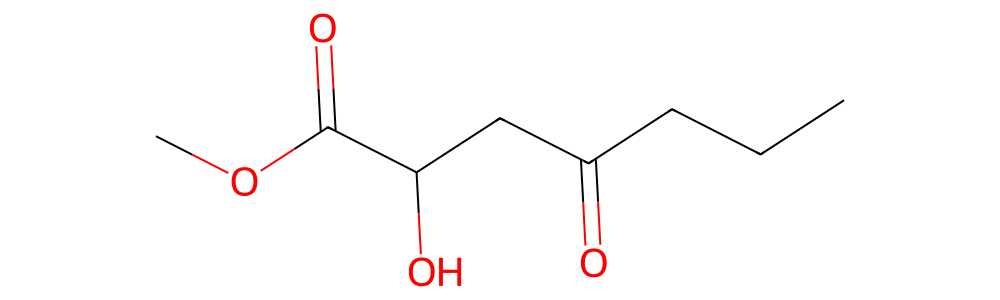

In [14]:
def visualize_example_n(combined_df, n):
    gt = combined_df.iloc[n][["smiles"]]
    predicitons = combined_df.iloc[n][[f"prediction_{i+1}" for i in range(10)]]

    gt_mol = Chem.MolFromSmiles(gt["smiles"])
    print(f"Ground truth: {gt}")
    display(Chem.Draw.MolToImage(gt_mol, size=(1000, 300)))

    pred_mols = [(Chem.MolFromSmiles(pred), pred) for pred in predicitons if pred]
    pred_simils = [morgan_similartiy(gt["smiles"], pred) for pred in predicitons if pred]
    mol_simils = sorted(list(zip(pred_mols, pred_simils)), key=lambda x: x[1], reverse=True)

    for i, ((mol, smiles), simil) in enumerate(mol_simils):
        print(f"Prediction {i+1}: {smiles}")
        print(f"Morgan similarity: {simil}")
        display(Chem.Draw.MolToImage(mol, size=(1000, 300)))

visualize_example_n(combined_df, 00)

In [39]:

# create a grouping column based on the pregrouping function
print(combined_df)
combined_df["grouping_col"] = combined_df.apply(pregrouping_function, axis=1)

# make a plot grouped by "grouping_col" showing "smiles_sim_of_closest_daylight_tanimoto"
fig = plot_function(combined_df, x="grouping_col", y=inspected_statistic(combined_df))
fig.update_layout(
            title=plot_title,
            xaxis_title=plot_x_label,
            yaxis_title=plot_y_label,
)
fig.show()
pregrouping_function = lambda row: len(row["mz"]) // 10 * 10 # binned num of peaks

Empty DataFrame
Columns: [gt_smiles, prediction_1, prediction_2, prediction_3, prediction_4, prediction_5, prediction_6, prediction_7, prediction_8, prediction_9, prediction_10]
Index: []

KeyboardInterrupt: 

# mess na diplomku
zjistit delky NIST splitu po filteringu

In [15]:
# imports
from __future__ import annotations
import sys 
sys.path.append("..")
from utils.data_utils import build_single_datapipe, filter_datapoints
import pandas as pd
import plotly.express as px
from collections import Counter
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit import DataStructs
import json
from tqdm import tqdm
import numpy as np

In [19]:

original_data_path = "../data/datasets/NIST/NIST_split_filip/valid.jsonl"

filtering_args = {"max_num_peaks": 300, "max_mz": 500, "max_mol_repr_len": 100, "mol_repr": "smiles"}


# load predictions and filter original data
original_data = pd.read_json(original_data_path, lines=True, orient="records")
filter_mask = original_data.progress_apply(lambda row: filter_datapoints(row, filtering_args), axis=1)
filtered_original_data = original_data[filter_mask]


len(filtered_original_data)

100%|██████████| 29053/29053 [00:10<00:00, 2750.47it/s]


28177